In [2]:
# from coffea.nanoevents import TreeMakerSchema, BaseSchema, NanoEventsFactory
# from fit_functions import fit_unbinned_double_gauss_Z, fit_unbinned_gauss_Z_with_background
import matplotlib.pyplot as plt
import uproot as up
import numpy as np
import pandas as pd
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT

Welcome to JupyROOT 6.26/10


In [3]:
dataset = '../outputs/2022MC_v1_AllCandidates.root'
file = up.open(dataset)

In [4]:
events = file['ntuple;1']
columns = ['Event', 'B_Ups1_mass', 'B_Ups2_mass', 'FourL_mass', 'FourL_VtxProb']
branches = events.arrays(columns)

In [5]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['FourL_mass'], axis=1))

    print(f"Number of candidates {text}: {candidates}")
    print(f"Number of events {text}: {events}")

In [6]:
print_summary(branches, 'Preselection')

Number of candidates Preselection: 2605
Number of events Preselection: 1


In [7]:
# convert to pandas dataframe
data_dict = {key: ak.to_list(branches[key][0]) for key in branches.fields}
df_candi = pd.DataFrame(data_dict)

In [8]:
df_candi

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
0,13.0,9.430899,86.743629,117.985611,0.911782
1,8.0,9.452165,91.311234,124.531960,0.960834
2,25.0,9.178766,92.203667,123.129684,0.789615
3,31.0,9.378906,89.051277,122.212578,0.655255
4,27.0,9.498000,88.223885,125.628838,0.806463
...,...,...,...,...,...
2600,986.0,9.530901,92.113792,125.675034,0.307705
2601,976.0,9.471189,93.397224,127.067383,0.564701
2602,974.0,9.283768,89.747337,122.578751,0.053486
2603,995.0,9.452576,88.650002,122.527786,0.657066


In [9]:
df_candi[df_candi.duplicated(subset='Event', keep=False)].sort_values('Event', ascending=False)

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
1555,999.0,9.564592,91.096611,125.696487,0.039785
2325,999.0,9.470986,92.425179,127.250099,0.639505
2075,999.0,9.432491,90.638260,124.693321,0.261776
1812,999.0,9.525687,91.354942,125.520386,0.019633
484,997.0,9.434041,93.195999,125.672630,0.040576
...,...,...,...,...,...
1286,2.0,9.448520,87.117210,125.676453,0.979790
1289,1.0,9.337581,89.256401,124.961472,0.944581
1560,1.0,9.583025,89.515999,124.311478,0.035787
2078,1.0,9.500834,91.743538,126.259811,0.493062


In [10]:
# for duplicated events, keep the one with the highest FourL_VtxProb
df_events = df_candi.sort_values('FourL_VtxProb', ascending=False).drop_duplicates('Event').sort_index()

In [11]:
df_events

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
0,13.0,9.430899,86.743629,117.985611,0.911782
1,8.0,9.452165,91.311234,124.531960,0.960834
3,31.0,9.378906,89.051277,122.212578,0.655255
4,27.0,9.498000,88.223885,125.628838,0.806463
5,47.0,9.529346,89.143555,126.443489,0.794648
...,...,...,...,...,...
2586,945.0,9.642431,91.999672,124.098732,0.758293
2594,965.0,9.424561,88.749733,122.555519,0.958683
2598,978.0,9.557230,90.845863,125.151741,0.713223
2600,986.0,9.530901,92.113792,125.675034,0.307705


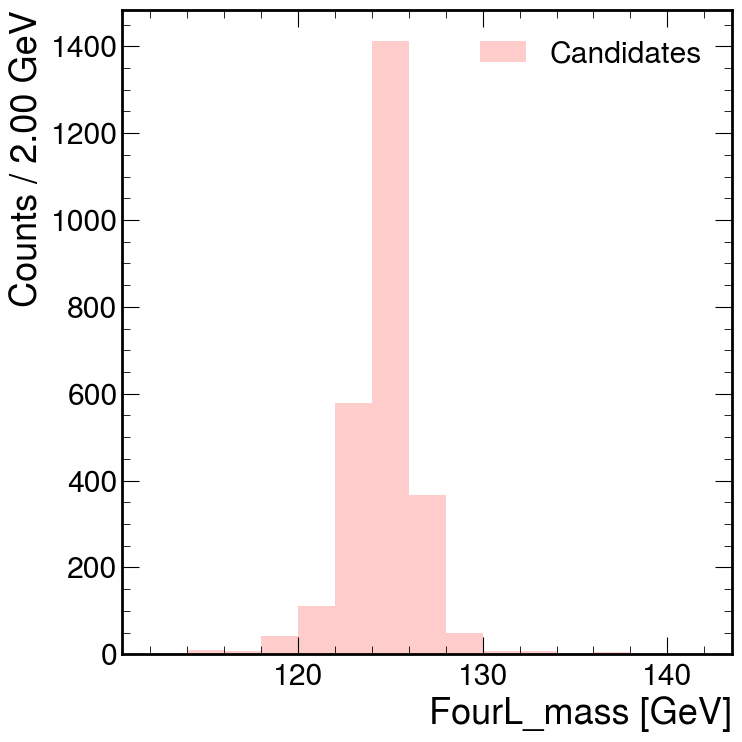

In [12]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 15, 112, 142
# plt.hist(ak.flatten(branches['FourL_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
# plt.hist(df_events['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("FourL_mass [GeV]")
plt.legend()
plt.tight_layout()

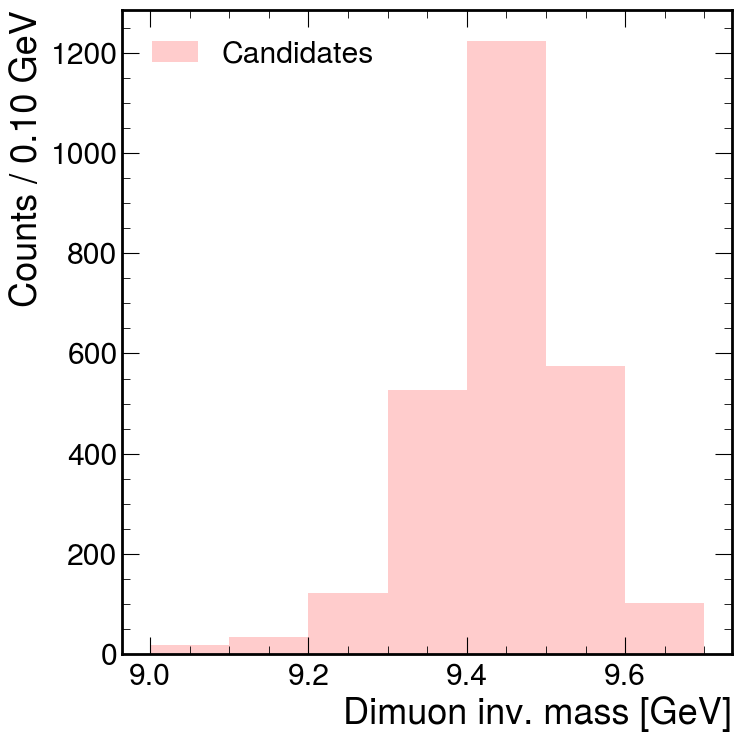

In [13]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 7, 9, 9.7
# plt.hist(ak.flatten(branches['B_Ups1_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
# plt.hist(df_events['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

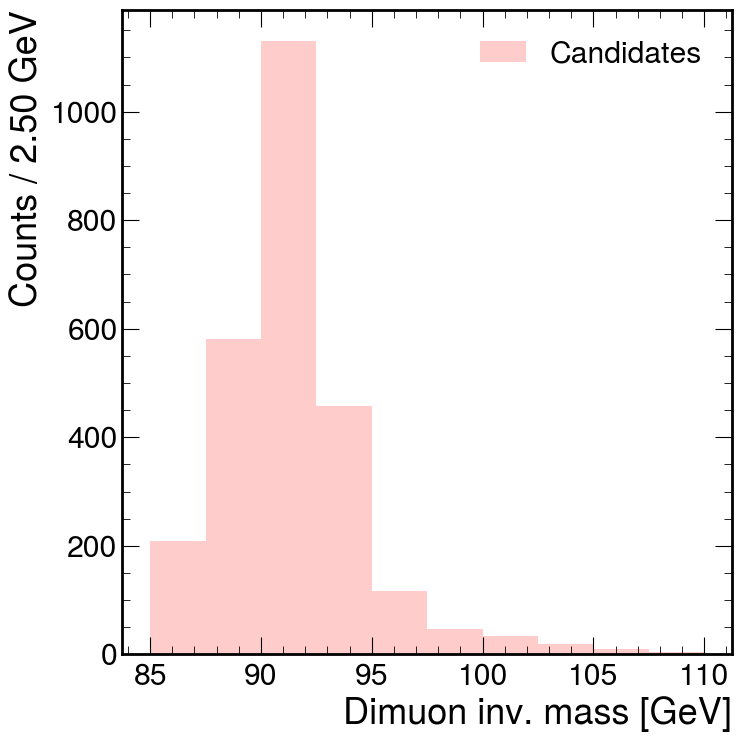

In [14]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 85, 110
# plt.hist(ak.flatten(branches['B_Ups2_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
# plt.hist(df_events['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

In [24]:
# concatenate the muons
B_J_mass = ak.concatenate([branches['B_J1_mass'], branches['B_J2_mass'], branches['B_J3_mass'], branches['B_J4_mass']], axis=0)

In [25]:
nbins, xlow, xhigh = 100, 70, 110
B_J_mass_candidates = ak.flatten(B_J_mass).to_numpy()
mass = ROOT.RooRealVar("B_J_mass", "DiMuon mass", xlow, xhigh, "GeV")
data = ROOT.RooDataSet.from_numpy({'B_J_mass': B_J_mass_candidates}, [mass])

[#0] WARNING:DataHandling -- RooDataSet.from_numpy() Ignored 413 out-of-range events


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (background,gaussian)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     2 a1           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     3 a2           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     4 mean         9.10000e+01  2.00000e+00    8.00000e+01  1.00000e+02
     5 nbkg         1.00000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     6 nsig         1.50000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     7 sigma        2.00000e+00  9.50000e-01    1.00000e-01

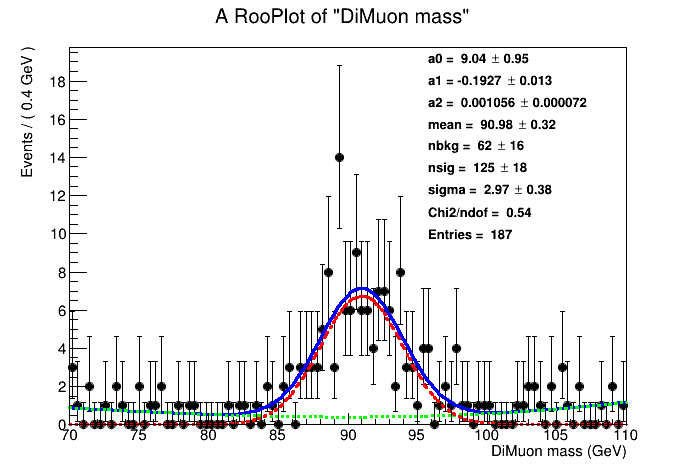

In [26]:
frame = fit_unbinned_gauss_Z_with_background(data, mass, nbins)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()

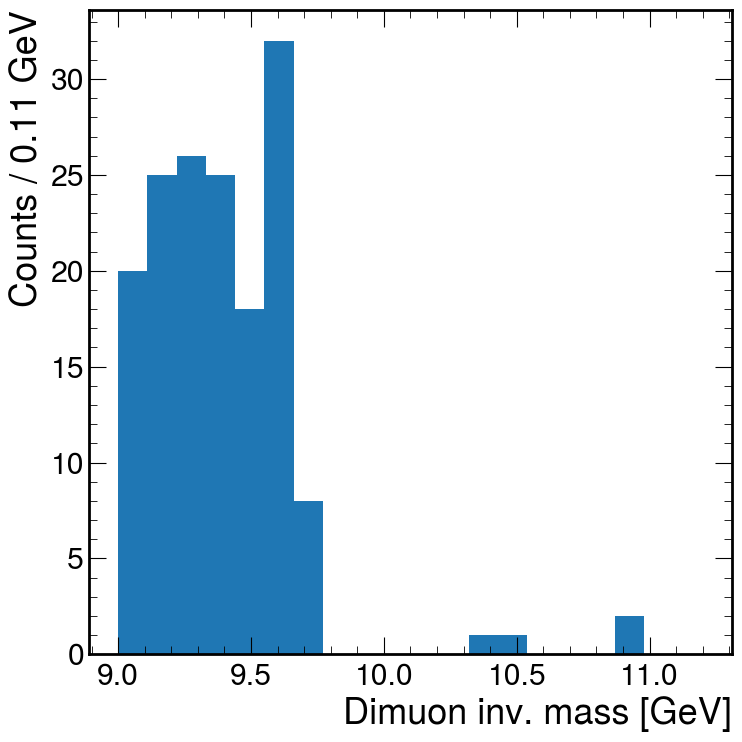

In [28]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 9, 11.2
plt.hist(ak.flatten(B_J_mass), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.tight_layout()

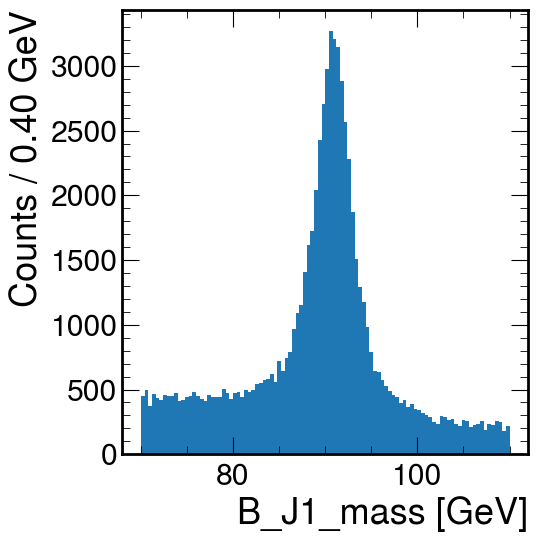

In [54]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 100, 70, 110
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()

In [ ]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()